In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
data=pd.read_csv('Mall_Customers.csv')

In [9]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**EDA**

In [10]:
data.drop('CustomerID', axis=1,inplace=True)

In [11]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


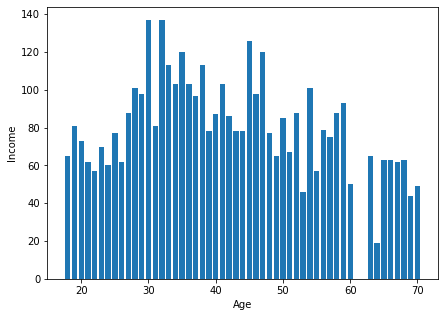

In [12]:
plt.figure(figsize=(7, 5))
plt.bar(data.Age,data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [13]:
scaler=StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [14]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


**Clustering**

In [15]:
max_clusters=50

In [16]:
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

In [17]:
inertias

[800.0000000000003,
 588.8026767824932,
 476.78755441351575,
 388.7178614053844,
 325.44857048543486,
 275.81432984807674,
 235.43099617231493,
 199.83225917430758,
 174.18800022186812,
 152.02983429775693,
 137.19816888181063,
 126.43518307789839,
 118.61749225698601,
 111.25770517636475,
 99.63161461336324,
 93.81872740562768,
 89.59008374431525,
 83.4936468118362,
 79.51828181007981,
 74.03495578606025,
 71.67236956261772,
 65.85098348823871,
 63.417652656981595,
 59.09282278868136,
 57.755477787674785,
 53.65464582222597,
 52.972348320839515,
 51.780219777140054,
 47.68018984174456,
 45.7927092095298,
 45.296796117694214,
 43.486811738728356,
 41.90341513626534,
 39.36850384531586,
 38.16459450986655,
 37.918889650499615,
 36.218924259406265,
 35.046678244273465,
 35.17912559970021,
 33.444396415698726,
 32.513247792583776,
 31.785972419998263,
 30.4096537498327,
 29.470278794613527,
 28.88773770814796,
 28.51902233109536,
 27.575089385251758,
 26.330040605232107,
 25.4250149471749

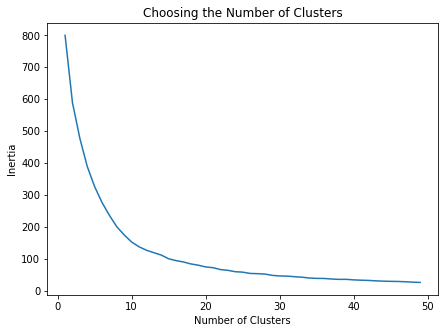

In [18]:
#Elbow Method:- Used to know the K or no. of clusters
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

In [19]:
kmeans=KMeans(n_clusters=10,n_init=10)
cluster=kmeans.fit_predict(scaled_data)
cluster

array([4, 4, 1, 6, 1, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 4, 1, 4, 0, 6, 4, 4,
       0, 4, 0, 4, 7, 4, 1, 6, 0, 6, 0, 4, 0, 6, 0, 6, 1, 6, 7, 4, 3, 1,
       7, 6, 7, 1, 1, 1, 7, 4, 1, 3, 7, 3, 7, 3, 1, 3, 3, 4, 7, 7, 3, 4,
       7, 7, 4, 1, 3, 7, 7, 7, 3, 4, 7, 4, 1, 7, 3, 4, 3, 7, 1, 3, 7, 1,
       1, 7, 7, 4, 3, 1, 1, 4, 7, 1, 3, 4, 1, 7, 3, 4, 3, 1, 7, 3, 3, 3,
       3, 1, 1, 4, 1, 1, 7, 7, 7, 7, 4, 1, 1, 2, 1, 9, 5, 2, 3, 2, 5, 2,
       1, 9, 5, 9, 8, 2, 5, 9, 8, 2, 1, 9, 5, 2, 3, 9, 8, 2, 5, 2, 8, 9,
       8, 9, 5, 9, 5, 9, 7, 9, 5, 9, 5, 9, 5, 9, 8, 2, 5, 2, 5, 2, 8, 9,
       5, 2, 5, 2, 8, 9, 5, 9, 8, 2, 8, 2, 8, 9, 8, 9, 5, 9, 8, 9, 8, 2,
       5, 2])

In [20]:
scaled_data['clusters']=cluster
scaled_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1.128152,-1.424569,-1.738999,-0.434801,4
1,1.128152,-1.281035,-1.738999,1.195704,4
2,-0.886405,-1.352802,-1.700830,-1.715913,1
3,-0.886405,-1.137502,-1.700830,1.040418,6
4,-0.886405,-0.563369,-1.662660,-0.395980,1


**PCA**

In [21]:
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1','PC2'])
reduced_data

,PC1,PC2
0,-0.903201,-0.780581
1,-0.775890,-1.771567
2,-3.642769,-0.262288
3,1.462846,-1.744054
4,-3.520473,-0.575415
...,...,...
195,4.934494,-0.644223
196,3.850245,1.182608
197,-2.188856,-0.674967
198,0.634294,0.954846


In [22]:
kmeans.cluster_centers_

array([[ 0.12087344,  0.90186807, -1.35094333, -1.5023944 ],
       [-0.88640526, -0.7284319 , -0.3343642 , -0.24586988],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [ 1.12815215,  1.39390484, -0.19660726, -0.15246286],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [ 1.12815215, -0.06498872,  0.98587395, -1.44416206],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [-0.88640526,  1.06163439, -0.29810324, -0.10065876],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511]])

In [23]:
reduced_centers=pca.fit_transform(kmeans.cluster_centers_)
reduced_centers

array([[-1.6019279 , -1.27049979],
       [ 0.48671583, -0.77848365],
       [ 0.94820177,  1.73191629],
       [-1.09606751,  0.399563  ],
       [ 0.67484265,  0.3727587 ],
       [-1.39795544,  1.21784888],
       [ 1.80396112, -1.24277858],
       [-0.37176361, -0.93428314],
       [-0.90465368,  0.105855  ],
       [ 1.45864678,  0.39810329]])

In [24]:
reduced_data['clusters'] = cluster
reduced_data

,PC1,PC2,clusters
0,-0.903201,-0.780581,4
1,-0.775890,-1.771567,4
2,-3.642769,-0.262288,1
3,1.462846,-1.744054,6
4,-3.520473,-0.575415,1
...,...,...,...
195,4.934494,-0.644223,9
196,3.850245,1.182608,8
197,-2.188856,-0.674967,2
198,0.634294,0.954846,5


**Data Visualization**

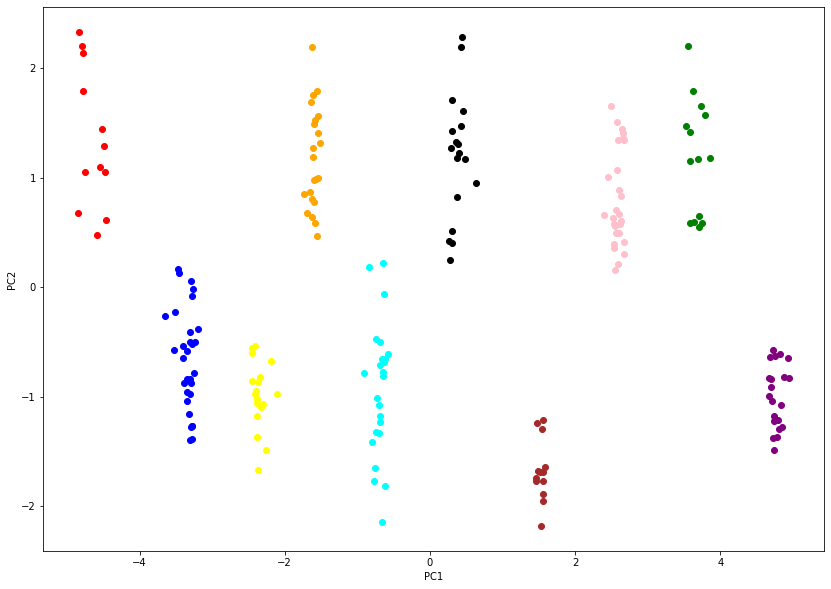

In [25]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['clusters'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['clusters'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['clusters'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['clusters'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['clusters'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['clusters'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 5].loc[:, 'PC2'], color='black')
plt.scatter(reduced_data[reduced_data['clusters'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['clusters'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['clusters'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['clusters'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 9].loc[:, 'PC2'], color='purple')


plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()